## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

參考資料：
https://morvanzhou.github.io/tutorials/machine-learning/keras/2-2-classifier/

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 用 Keras 來構建一個分類神經網絡，用到的數據集是 MNIST，就是 0 到 9 這幾個數字的圖片數據集。
# 從 Keras 的內建功能中，取得 cifar10 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# X 是一張張圖片，Y 是每張圖片對應的標籤，即它是哪個數字。
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
# 因為每個像素都是在 0 到 255 之間的，標準化之後就變成了 0 到 1 之間。
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 對於 y，要用到 Keras 改造的 numpy 的一個函數 np_utils.to_categorical。
# 把 y 變成了one-hot 的形式，即之前 y 是一個數值， 在 0-9 之間，現在是一個大小為10 的向量，它屬於哪個數字，就在哪個位置為1，其他位置都是0。
# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 與範例相同，建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型，請將 Optimizer 換成 SGD
"""
optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
訓練模型並檢視驗證集的結果
請將 Epoch 加到 500 個
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 151us/step - loss: 2.2655 - accuracy: 0.1540 - val_loss: 2.2218 - val_accuracy: 0.1962
Epoch 2/500
50000/50000 [==============================] - 6s 121us/step - loss: 2.1939 - accuracy: 0.2110 - val_loss: 2.1650 - val_accuracy: 0.2299
Epoch 3/500
50000/50000 [==============================] - 6s 125us/step - loss: 2.1417 - accuracy: 0.2415 - val_loss: 2.1162 - val_accuracy: 0.2480
Epoch 4/500
50000/50000 [==============================] - 6s 125us/step - loss: 2.0953 - accuracy: 0.2587 - val_loss: 2.0731 - val_accuracy: 0.2707
Epoch 5/500
50000/50000 [==============================] - 6s 120us/step - loss: 2.0554 - accuracy: 0.2752 - val_loss: 2.0365 - val_accuracy: 0.2744
Epoch 6/500
50000/50000 [==============================] - 6s 126us/step - loss: 2.0216 - accuracy: 0.2869 - val_loss: 2.0063 - val_accuracy: 0.2841
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 128us/step - loss: 1.6743 - accuracy: 0.4170 - val_loss: 1.6805 - val_accuracy: 0.4158
Epoch 56/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.6708 - accuracy: 0.4199 - val_loss: 1.6795 - val_accuracy: 0.4133
Epoch 57/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6675 - accuracy: 0.4220 - val_loss: 1.6728 - val_accuracy: 0.4173
Epoch 58/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.6646 - accuracy: 0.4227 - val_loss: 1.6725 - val_accuracy: 0.4155
Epoch 59/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6610 - accuracy: 0.4239 - val_loss: 1.6718 - val_accuracy: 0.4179
Epoch 60/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6579 - accuracy: 0.4242 - val_loss: 1.6628 - val_accuracy: 0.4229
Epoch 61/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.6548 - accuracy: 0.4254 - val

50000/50000 [==============================] - 7s 131us/step - loss: 1.5323 - accuracy: 0.4670 - val_loss: 1.5547 - val_accuracy: 0.4565
Epoch 110/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5302 - accuracy: 0.4678 - val_loss: 1.5563 - val_accuracy: 0.4563
Epoch 111/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.5282 - accuracy: 0.4676 - val_loss: 1.5531 - val_accuracy: 0.4582
Epoch 112/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5262 - accuracy: 0.4687 - val_loss: 1.5533 - val_accuracy: 0.4596
Epoch 113/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.5243 - accuracy: 0.4700 - val_loss: 1.5477 - val_accuracy: 0.4608
Epoch 114/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5224 - accuracy: 0.4711 - val_loss: 1.5482 - val_accuracy: 0.4595
Epoch 115/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.5200 - accuracy: 0.4715

50000/50000 [==============================] - 6s 121us/step - loss: 1.4376 - accuracy: 0.4993 - val_loss: 1.4853 - val_accuracy: 0.4769
Epoch 164/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4363 - accuracy: 0.4999 - val_loss: 1.4804 - val_accuracy: 0.4796
Epoch 165/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4346 - accuracy: 0.5002 - val_loss: 1.4792 - val_accuracy: 0.4803
Epoch 166/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4325 - accuracy: 0.5007 - val_loss: 1.4825 - val_accuracy: 0.4790
Epoch 167/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.4316 - accuracy: 0.5025 - val_loss: 1.4788 - val_accuracy: 0.4831
Epoch 168/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4301 - accuracy: 0.5019 - val_loss: 1.4795 - val_accuracy: 0.4828
Epoch 169/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.4281 - accuracy: 0.5026

50000/50000 [==============================] - 6s 123us/step - loss: 1.3584 - accuracy: 0.5267 - val_loss: 1.4332 - val_accuracy: 0.4925
Epoch 218/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.3575 - accuracy: 0.5267 - val_loss: 1.4313 - val_accuracy: 0.4960
Epoch 219/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.3561 - accuracy: 0.5277 - val_loss: 1.4322 - val_accuracy: 0.4935
Epoch 220/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.3548 - accuracy: 0.5288 - val_loss: 1.4427 - val_accuracy: 0.4947 1.3549 - accura - ETA: 0s - loss: 1.3548 - accura
Epoch 221/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.3531 - accuracy: 0.5283 - val_loss: 1.4372 - val_accuracy: 0.4973
Epoch 222/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.3514 - accuracy: 0.5286 - val_loss: 1.4446 - val_accuracy: 0.4929
Epoch 223/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 125us/step - loss: 1.2883 - accuracy: 0.5495 - val_loss: 1.4194 - val_accuracy: 0.5001
Epoch 272/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2874 - accuracy: 0.5508 - val_loss: 1.4018 - val_accuracy: 0.4985
Epoch 273/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2860 - accuracy: 0.5504 - val_loss: 1.4189 - val_accuracy: 0.5000
Epoch 274/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2840 - accuracy: 0.5511 - val_loss: 1.4036 - val_accuracy: 0.4981
Epoch 275/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2841 - accuracy: 0.5525 - val_loss: 1.3998 - val_accuracy: 0.4993
Epoch 276/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2826 - accuracy: 0.5513 - val_loss: 1.4075 - val_accuracy: 0.5023
Epoch 277/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2806 - accuracy: 0.5519

50000/50000 [==============================] - 6s 115us/step - loss: 1.2241 - accuracy: 0.5738 - val_loss: 1.3844 - val_accuracy: 0.5089
Epoch 326/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2234 - accuracy: 0.5730 - val_loss: 1.3765 - val_accuracy: 0.5138
Epoch 327/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.2220 - accuracy: 0.5727 - val_loss: 1.3901 - val_accuracy: 0.5006
Epoch 328/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2208 - accuracy: 0.5756 - val_loss: 1.3655 - val_accuracy: 0.5157
Epoch 329/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.2191 - accuracy: 0.5761 - val_loss: 1.3708 - val_accuracy: 0.5151
Epoch 330/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2190 - accuracy: 0.5753 - val_loss: 1.3702 - val_accuracy: 0.5143
Epoch 331/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2173 - accuracy: 0.5752

50000/50000 [==============================] - 6s 113us/step - loss: 1.1652 - accuracy: 0.5941 - val_loss: 1.3579 - val_accuracy: 0.5124
Epoch 380/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1649 - accuracy: 0.5943 - val_loss: 1.3568 - val_accuracy: 0.5177
Epoch 381/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1633 - accuracy: 0.5947 - val_loss: 1.3607 - val_accuracy: 0.5134
Epoch 382/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1623 - accuracy: 0.5962 - val_loss: 1.3498 - val_accuracy: 0.5201
Epoch 383/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1602 - accuracy: 0.5970 - val_loss: 1.3957 - val_accuracy: 0.5052
Epoch 384/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.1593 - accuracy: 0.5969 - val_loss: 1.4093 - val_accuracy: 0.5032
Epoch 385/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.1587 - accuracy: 0.5974

50000/50000 [==============================] - 6s 115us/step - loss: 1.1078 - accuracy: 0.6145 - val_loss: 1.3561 - val_accuracy: 0.5180
Epoch 434/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1083 - accuracy: 0.6146 - val_loss: 1.3406 - val_accuracy: 0.5208
Epoch 435/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1088 - accuracy: 0.6134 - val_loss: 1.3635 - val_accuracy: 0.5124
Epoch 436/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1053 - accuracy: 0.6147 - val_loss: 1.3710 - val_accuracy: 0.5054
Epoch 437/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1050 - accuracy: 0.6146 - val_loss: 1.3471 - val_accuracy: 0.5182
Epoch 438/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1027 - accuracy: 0.6160 - val_loss: 1.3840 - val_accuracy: 0.5185
Epoch 439/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1028 - accuracy: 0.6168

50000/50000 [==============================] - 6s 117us/step - loss: 1.0530 - accuracy: 0.6333 - val_loss: 1.3382 - val_accuracy: 0.5282
Epoch 488/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.0532 - accuracy: 0.6349 - val_loss: 1.3473 - val_accuracy: 0.5251
Epoch 489/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.0508 - accuracy: 0.6342 - val_loss: 1.3396 - val_accuracy: 0.5250
Epoch 490/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.0525 - accuracy: 0.6340 - val_loss: 1.3765 - val_accuracy: 0.5142
Epoch 491/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.0485 - accuracy: 0.6358 - val_loss: 1.3576 - val_accuracy: 0.5198
Epoch 492/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.0480 - accuracy: 0.6357 - val_loss: 1.3404 - val_accuracy: 0.5289
Epoch 493/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.0471 - accuracy: 0.6365

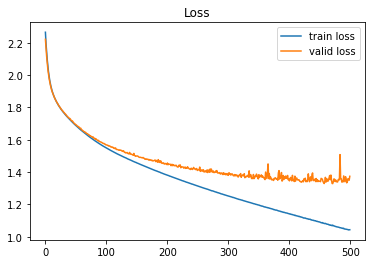

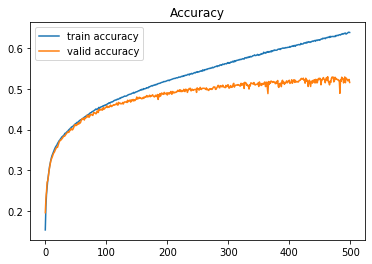

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()